**Info**


*   **Computer vision training camp** for Micro Club's 1st wave of internal trainings.
* **Trainer:**  Sarra Laksaci -> SarraLKSC#7509 , saralaksaci@gmail.com





This notebook is the classification assignement on the CIFAR10 dataset.
Fill in the missing codes in order to build train and evaluate a model that will be able to correctly classify the images.
* Dataset description [available here](https://www.tensorflow.org/datasets/catalog/cifar10)
* 


###**1.Work with the data**

In [ ]:
#Import libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#load the data
cifar,info=tfds.load('cifar10',with_info=True,split=['train','test'],shuffle_files=True)

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteIC91I8/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteIC91I8/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
#check out the data info (important in order to make the right choices)
info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
#check the format of the dataset and the type of data
cifar

[<_OptionsDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>,
 <_OptionsDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>]

In [ ]:
#split dataset into trainset and testset
cifar_train=cifar[0]
cifar_test=cifar[1]

In [ ]:
#split training data images from labels  
X_train=[]
Y_train=[]
for x in cifar_train:
  image=x['image']
  label=x['label']
  X_train.append(image)
  Y_train.append(label)

print('nombre d\'images du trainingset={}'.format(len(X_train)))
print('nombre de label du trainingser={}'.format(len(Y_train)))

nombre d'images du trainingset=50000
nombre de label du trainingser=50000


In [ ]:
#split testing data images from labels 
X_test=[]
Y_test=[]
for x in cifar_test:
  image=x['image']
  label=x['label']
  X_test.append(image)
  Y_test.append(label)
print('nombre d\'images du testgset={}'.format(len(X_test)))
print('nombre de label du testset={}'.format(len(Y_test))) 

nombre d'images du testgset=10000
nombre de label du testset=10000


In [ ]:
Y_test[0]

<tf.Tensor: shape=(), dtype=int64, numpy=7>

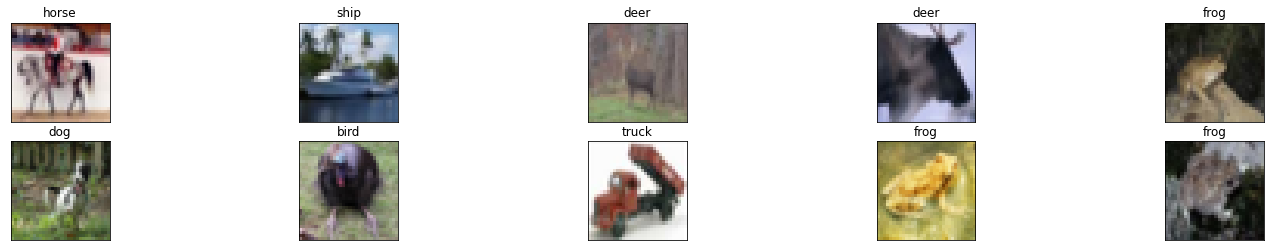

In [ ]:
#visualize the data
fig=plt.figure(figsize=(25,4))
for i in range(10):
  ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
  plt.imshow(X_train[i])
  ax.set_title(class_names[Y_train[i]])

In [ ]:
#process the data
X_train=np.asarray(X_train,dtype=np.float64)
Y_train=np.asarray(Y_train,dtype=np.float64).reshape((-1,1))
X_test=np.asarray(X_test,dtype=np.float64)
Y_test=np.asarray(Y_test,dtype=np.float64).reshape((-1,1))

In [ ]:
Y_test.shape

(10000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

###**2.Build the model**

In [ ]:
#build the architecture of the model
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(16,(3,3),input_shape=(32,32,3)),
                           tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D((2,2)),
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D((2,2)),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dense(10,activation='softmax')

])

In [ ]:
#make decisions for the backpropagation (loss, optimizer,metrics)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='Adam',metrics=['accuracy'])

In [ ]:
#launch the training
history=model.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test))

Epoch 1/15
1563/1563 [==============================] - 74s 47ms/step - loss: 3.5624 - accuracy: 0.1772 - val_loss: 1.6977 - val_accuracy: 0.3766
Epoch 2/15
1563/1563 [==============================] - 76s 48ms/step - loss: 1.7175 - accuracy: 0.3675 - val_loss: 1.4920 - val_accuracy: 0.4577
Epoch 3/15
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5128 - accuracy: 0.4496 - val_loss: 1.3334 - val_accuracy: 0.5278
Epoch 4/15
1563/1563 [==============================] - 73s 47ms/step - loss: 1.3885 - accuracy: 0.5061 - val_loss: 1.2835 - val_accuracy: 0.5500
Epoch 5/15
1563/1563 [==============================] - 74s 47ms/step - loss: 1.3043 - accuracy: 0.5356 - val_loss: 1.1639 - val_accuracy: 0.5935
Epoch 6/15
1563/1563 [==============================] - 75s 48ms/step - loss: 1.2317 - accuracy: 0.5703 - val_loss: 1.1435 - val_accuracy: 0.5972
Epoch 7/15
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1737 - accuracy: 0.5872 - val_loss: 1.0787 -

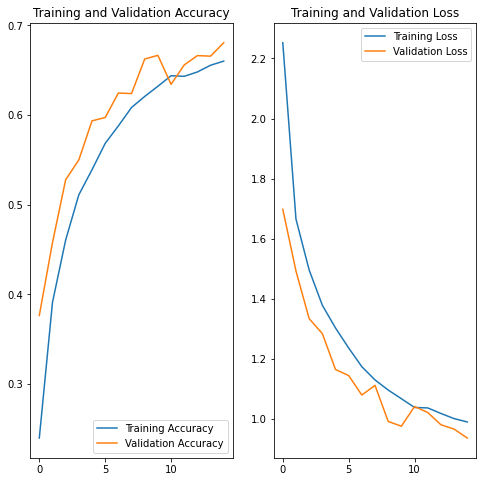

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [ ]:
model.evaluate(X_test,Y_test)